# 导入需要的库

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle

F:\Users\DELL\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
F:\Users\DELL\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
F:\Users\DELL\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


# 导入数据，探索数据

In [2]:
china = load_sample_image("china.jpg")
china

array([[[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]],

       [[172, 199, 229],
        [173, 200, 230],
        [173, 200, 230],
        ...,
        [251, 252, 255],
        [251, 252, 255],
        [251, 252, 255]],

       [[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [252, 253, 255]],

       ...,

       [[ 88,  80,   7],
        [147, 138,  69],
        [122, 116,  38],
        ...,
        [ 39,  42,  33],
        [  8,  14,   2],
        [  6,  12,   0]],

       [[122, 112,  41],
        [129, 120,  53],
        [118, 112,  36],
        ...,
        [  9,  12,   3],
        [  9,  15,   3],
        [ 16,  24,   9]],

       [[116, 103,  35],
        [104,  93,  31],
        [108, 102,  28],
        ...,
        [ 43,  49,  39],
        [ 13,  21,   6],
        [ 15,  24,   7]]

In [3]:
china.shape # 长度，宽度，像素

(427, 640, 3)

In [4]:
china[0][0]

array([174, 201, 231], dtype=uint8)

In [5]:
# 包含多少种不同的颜色
newimage = china.reshape(427*640,3)

In [6]:
newimage.shape

(273280, 3)

In [7]:
import pandas as pd

In [8]:
pd.DataFrame(newimage).drop_duplicates().shape # 去除重复值后有96615种颜色

(96615, 3)

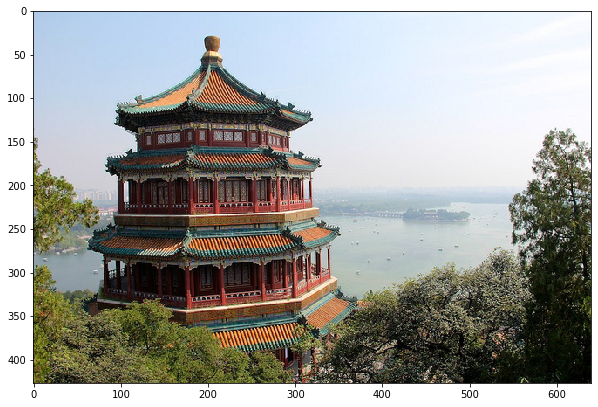

In [10]:
#图像可视化
plt.figure(figsize=(10,10))
plt.imshow(china) # 导入3维数组形成的图片

图像探索完毕，我们了解了，图像现在有9W多种颜色。我们希望来试试看，能否使用K-Means将颜色压缩到64<br>
种，还不严重损耗图像的质量。为此，我们要使用K-Means来将9W种颜色聚类成64类，然后使用64个簇的质心来<br>
替代全部的9W种颜色，记得质心有着这样的性质：簇中的点都是离质心最近的样本点。<br>
<br>
为了比较，我们还要画出随机压缩到64种颜色的矢量量化图像。我们需要随机选取64个样本点作为随机质心，计<br>
算原数据中每个样本到它们的距离来找出离每个样本最近的随机质心，然后用每个样本所对应的随机质心来替换原<br>
本的样本。两种状况下，我们观察图像可视化之后的状况，以查看图片信息的损失。<br>
<br>
在这之前，我们需要把数据处理成sklearn中的K-Means类能够接受的数据。

# 决定超参数，数据预处理

In [11]:
n_clusters = 64
# plt.imshow()在浮点数上表现优异，在这里我们把china中的数据，转换成浮点数，压缩到[0,1]之间
china = np.array(china, dtype=np.float64) / china.max()

In [12]:
w , h , d = original_shape = tuple(china.shape)

In [13]:
w,h,d

(427, 640, 3)

In [14]:
d_ = 3
assert d_ ==3 # 哟求d_必须等于3，否则报错

In [15]:
image_array = np.reshape(china,(w*h,d))

In [16]:
image_array.shape

(273280, 3)

In [23]:
image_array

array([[0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       [0.68235294, 0.78823529, 0.90588235],
       ...,
       [0.16862745, 0.19215686, 0.15294118],
       [0.05098039, 0.08235294, 0.02352941],
       [0.05882353, 0.09411765, 0.02745098]])

# 对数据进行K-Means的矢量量化

In [24]:
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(image_array_sample)
kmeans.cluster_centers_

array([[0.11798806, 0.11884058, 0.07007673],
       [0.80874811, 0.82262443, 0.85671192],
       [0.47614379, 0.46895425, 0.27124183],
       [0.92831097, 0.95803234, 0.99566563],
       [0.52      , 0.5254902 , 0.39529412],
       [0.61895425, 0.67712418, 0.70816993],
       [0.31198257, 0.34030501, 0.18954248],
       [0.82923351, 0.90641711, 0.98743316],
       [0.80392157, 0.53006536, 0.3751634 ],
       [0.25202614, 0.23764706, 0.20104575],
       [0.03328773, 0.02836297, 0.01732786],
       [0.3454902 , 0.1854902 , 0.12470588],
       [0.52156863, 0.49150327, 0.52592593],
       [0.74457516, 0.83934641, 0.95045752],
       [0.72941176, 0.35764706, 0.23137255],
       [0.41470588, 0.44656863, 0.40980392],
       [0.96176471, 0.77058824, 0.63039216],
       [0.69019608, 0.74705882, 0.7605042 ],
       [0.57019608, 0.41098039, 0.34588235],
       [0.93630422, 0.93594771, 0.94913844],
       [0.3875817 , 0.45620915, 0.10588235],
       [0.56684492, 0.62388592, 0.64171123],
       [0.

In [25]:
# 找出质心后，按照已存在的质心对所有数据进行聚类
labels = kmeans.predict(image_array)
labels.shape

(273280,)

In [30]:
# 使用质心替换所有的样本
image_kmeans = image_array.copy()
for i in range(w*h):
    image_kmeans[i] = kmeans.cluster_centers_[labels[i]]
image_kmeans

array([[0.73557423, 0.8162465 , 0.91134454],
       [0.73557423, 0.8162465 , 0.91134454],
       [0.73557423, 0.8162465 , 0.91134454],
       ...,
       [0.15496138, 0.15995247, 0.12477718],
       [0.07029412, 0.07941176, 0.04921569],
       [0.07029412, 0.07941176, 0.04921569]])

In [31]:
image_kmeans.shape

(273280, 3)

In [32]:
pd.DataFrame(image_kmeans).drop_duplicates().shape

(64, 3)

In [39]:
image_kmeans = image_kmeans.reshape(w,h,d)
image_kmeans.shape

(427, 640, 3)

# 对数据进行随机的矢量量化

In [33]:
centroid_random = shuffle(image_array, random_state=0)[:n_clusters]

In [34]:
centroid_random.shape

(64, 3)

In [35]:
# 函数pairwise_distances_argmin(x1,x2,axis) # x1,x2分别是序列
# 用来计算x2中的每个样本到x1中的每个样本点的距离，并返回x2相同形状，x1中对应的最近的样本的索引
labels_random = pairwise_distances_argmin(centroid_random,image_array,axis=0)
labels_random.shape

(273280,)

In [ ]:
len(set(labels_random))

In [36]:
# 使用随机质心来替换所有样本
image_random = image_array.copy()
for i in range(w*h):
    image_random[i] = centroid_random[labels_random[i]]
image_random = image_random.reshape(w,h,d)
image_random.shape

(427, 640, 3)

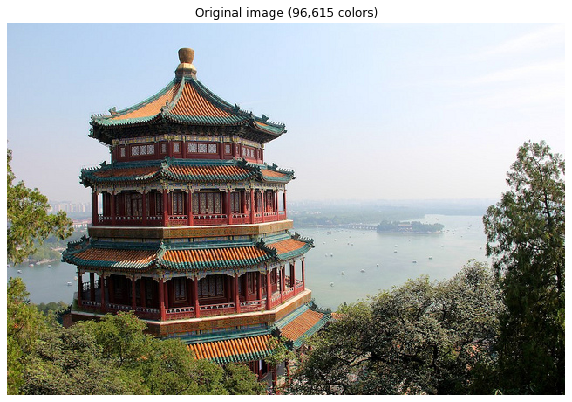

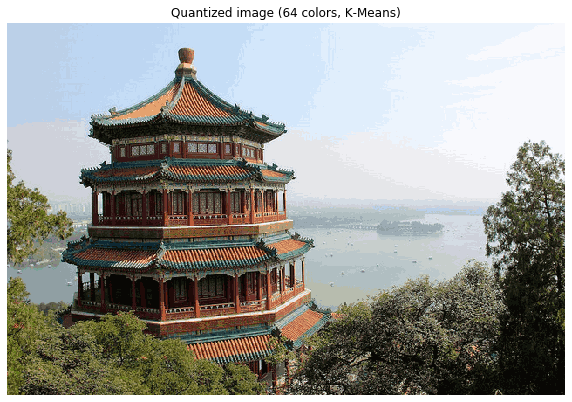

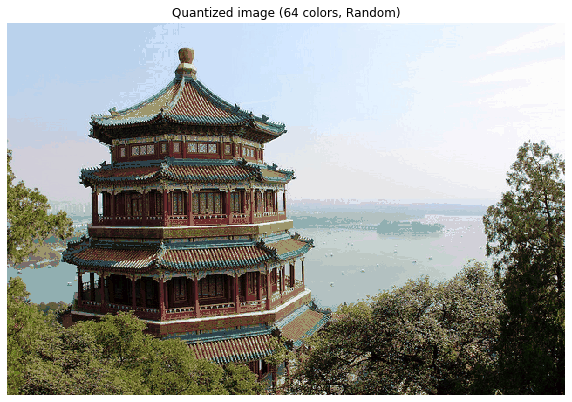

In [41]:
plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(china)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Quantized image (64 colors, K-Means)')
plt.imshow(image_kmeans)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Quantized image (64 colors, Random)')
plt.imshow(image_random)
plt.show()
